In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, cohen_kappa_score, precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.utils import resample

In [109]:
heart_data = "../data/raw/heart_disease_health_indicators_BRFSS2015.csv"
heart_df = pd.read_csv(heart_data)

In [110]:
heart_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [111]:
heart_df.shape

(253680, 22)

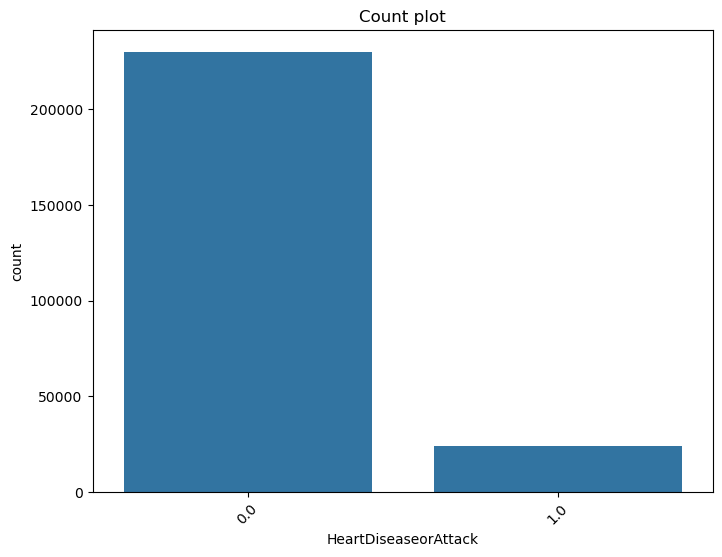

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_df, x='HeartDiseaseorAttack')
plt.title(f'Count plot')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [113]:
#Evaluating the raw dataset (no sampling) for accuracy, kappa, and recall with a KNN ML model at various k-values
target = heart_df['HeartDiseaseorAttack']
features = heart_df.drop('HeartDiseaseorAttack', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

#Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)

# Evaluate the model on the test set
for i in range(3, 9):
    print(f"For n_neighbors: {i}")
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f" Accuracy: {((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .3f}")        
    print(f"Recall: {recall: .3f}")
    print(f"Cohen's Kappa: {kappa:.4f}")   
    #print(cm)
    print()

For n_neighbors: 3
 Accuracy:  88.67%
Recall:  0.149
Cohen's Kappa: 0.1448

For n_neighbors: 4
 Accuracy:  90.11%
Recall:  0.059
Cohen's Kappa: 0.0761

For n_neighbors: 5
 Accuracy:  89.57%
Recall:  0.110
Cohen's Kappa: 0.1250

For n_neighbors: 6
 Accuracy:  90.25%
Recall:  0.052
Cohen's Kappa: 0.0698

For n_neighbors: 7
 Accuracy:  89.98%
Recall:  0.084
Cohen's Kappa: 0.1039

For n_neighbors: 8
 Accuracy:  90.34%
Recall:  0.044
Cohen's Kappa: 0.0604



In [192]:
def test_data_knn(heart_df, x=3, y=11):
    '''Evaluating the dataset for accuracy, kappa, and recall with a KNN ML model at a range of k-values
    Takes a starting dataframe (heart_df), and a range of k-values to test (x: min, y: max))
    Starting dataframe must contain 'HeartDiseaseorAttack' column
    Returns a dataframe of results'''
    
    target = heart_df['HeartDiseaseorAttack']
    features = heart_df.drop('HeartDiseaseorAttack', axis=1)
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)
    
    results = []

    # Evaluate the model on the test set
    for i in range(x, y+1):
        print(f"\rRunning for n_neighbors: {i}", end=" ", flush=True)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = ((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1])))

        
        #print(f" Accuracy: {accuracy: .3f}")        
        #print(f"Recall: {recall: .3f}")
        #print(f"Cohen's Kappa: {kappa:.4f}")   
        #print(cm)
        #print()
        results.append({
            "k": i,
            "Accuracy": accuracy,
            "Recall": recall,
            "Kappa": kappa
        })
    results_df = pd.DataFrame(results)

    return results_df

In [194]:
def test_normalised_data_knn(heart_df, x=3, y=11):
    '''Evaluating the dataset for accuracy, kappa, and recall with a KNN ML model at a range of k-values
    Takes a starting dataframe (heart_df), and a range of k-values to test (x: min, y: max))
    Normalised all columns for min-max to 0-1
    Starting dataframe must contain 'HeartDiseaseorAttack' column
    Returns a dataframe of results'''
    
    target = heart_df['HeartDiseaseorAttack']
    features = heart_df.drop('HeartDiseaseorAttack', axis=1)
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)
    
    #Normalise all columns to be 0-1
    normalizer = MinMaxScaler()
    normalizer.fit(x_train)
    
    x_train_norm = normalizer.transform(x_train)
    x_test_norm = normalizer.transform(x_test)
    
    x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
    x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)
    results = []

    # Evaluate the model on the test set
    for i in range(x, y+1):
        print(f"\rRunning for n_neighbors: {i}", end=" ", flush=True)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train_norm, y_train)
        y_pred = knn.predict(x_test_norm)
        cm = confusion_matrix(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = ((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1])))

        
        #print(f" Accuracy: {accuracy: .3f}")        
        #print(f"Recall: {recall: .3f}")
        #print(f"Cohen's Kappa: {kappa:.4f}")   
        #print(cm)
        #print()
        results.append({
            "k": i,
            "Accuracy": accuracy,
            "Recall": recall,
            "Kappa": kappa
        })
    results_df = pd.DataFrame(results)

    return results_df

In [163]:
test_normalised_data_knn(heart_df, 3, 8)

Running for n_neighbors: 3
Running for n_neighbors: 4
Running for n_neighbors: 5
Running for n_neighbors: 6
Running for n_neighbors: 7


,k,Accuracy,Recall,Kappa
0,3,0.887457,0.190277,0.185210
1,4,0.901786,0.095977,0.123791
2,5,0.896622,0.158215,0.178154
3,6,0.903087,0.091995,0.122366
4,7,0.900110,0.140821,0.169656


In [164]:
test_data_knn(heart_df, 3, 8)

Running for n_neighbors: 3

Running for n_neighbors: 4

Running for n_neighbors: 5

Running for n_neighbors: 6

Running for n_neighbors: 7



,k,Accuracy,Recall,Kappa
0,3,0.886747,0.149204,0.144802
1,4,0.901096,0.059304,0.076088
2,5,0.895676,0.110226,0.124994
3,6,0.902476,0.052179,0.069787
4,7,0.899795,0.083613,0.103856


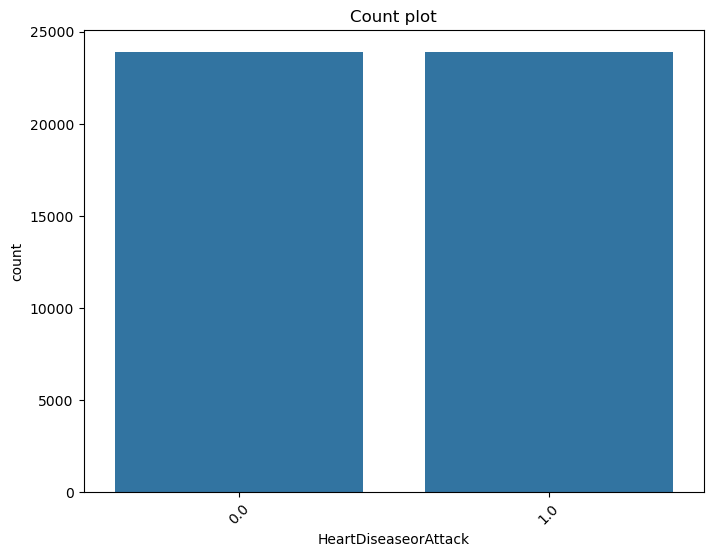

In [114]:
train = heart_df.copy()

heart_issues = train[train["HeartDiseaseorAttack"] == 1]
no_heart_issues = train[train["HeartDiseaseorAttack"] == 0]

undersampled_heart_df =  resample(no_heart_issues,
                         replace=False, 
                         n_samples = len(heart_issues),
                         random_state=0)

resampled_df = pd.concat([undersampled_heart_df, heart_issues])
#resampled_df.to_csv('../data/clean/resampled_data.csv')


plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_df, x='HeartDiseaseorAttack')
plt.title(f'Count plot')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

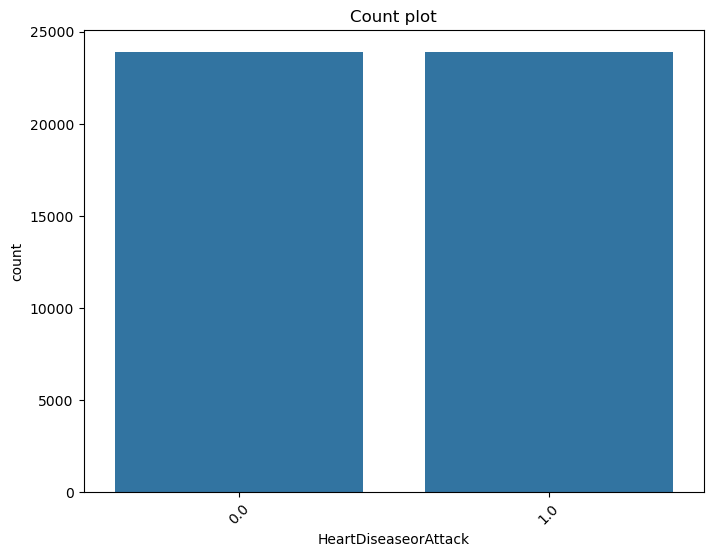

In [114]:
def resample_and_save(heart_df):
    '''Resamples dataframe to remove extra non-heart disease rows to be equal to those with heart_disease'''
    
    train = heart_df.copy()
    
    heart_issues = train[train["HeartDiseaseorAttack"] == 1]
    no_heart_issues = train[train["HeartDiseaseorAttack"] == 0]
    
    undersampled_heart_df =  resample(no_heart_issues,
                             replace=False, 
                             n_samples = len(heart_issues),
                             random_state=0)
    
    resampled_df = pd.concat([undersampled_heart_df, heart_issues])
    resampled_df.to_csv('../data/clean/resampled_data.csv')
    return resampled_df


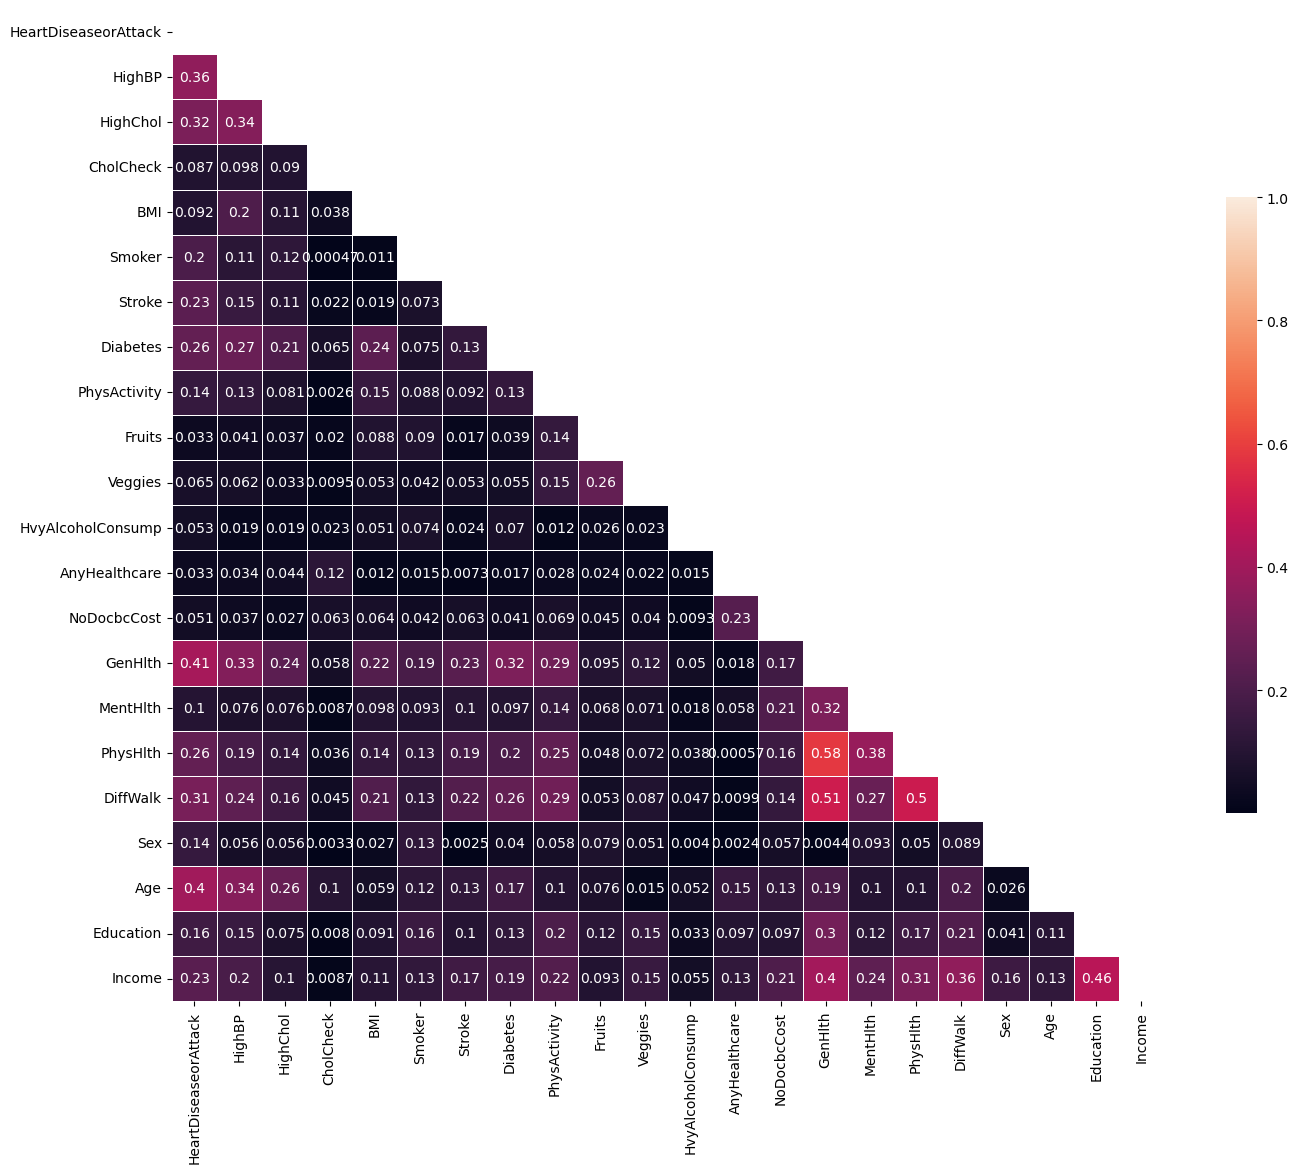

In [116]:
corr=np.abs(resampled_df.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [196]:
drop_df = resampled_df.drop(['PhysHlth', 'DiffWalk','Education'],  axis=1)
drop_df2 = resampled_df.drop(['PhysHlth', 'DiffWalk','Education', 'MentHlth', 'Income', 'BMI'],  axis=1)


In [175]:
test_data_knn(resampled_df, 3, 21)

Running for n_neighbors: 21 

,k,Accuracy,Recall,Kappa
0,3,0.705064,0.719891,0.410173
1,4,0.693032,0.605749,0.385771
2,5,0.723373,0.751574,0.446829
3,6,0.713538,0.667646,0.426932
4,7,0.730488,0.763533,0.461070
5,8,0.726826,0.706462,0.453589
6,9,0.735300,0.774444,0.470711
7,10,0.731743,0.725976,0.463467
8,11,0.739590,0.784515,0.479305
9,12,0.736974,0.746748,0.473975


In [176]:
test_normalised_data_knn(resampled_df, 3, 21)

Running for n_neighbors: 21 

,k,Accuracy,Recall,Kappa
0,3,0.721594,0.733529,0.443223
1,4,0.710923,0.630508,0.421591
2,5,0.737602,0.753252,0.475247
3,6,0.729546,0.681914,0.458950
4,7,0.740427,0.764163,0.480919
5,8,0.739171,0.713596,0.478269
6,9,0.743566,0.771507,0.487207
7,10,0.740218,0.726815,0.480396
8,11,0.747646,0.777591,0.495372
9,12,0.744507,0.740034,0.489000


In [188]:
test_normalised_data_knn(drop_df, 3, 15)

Running for n_neighbors: 15 

,k,Accuracy,Recall,Kappa
0,3,0.724733,0.731431,0.449485
1,4,0.712701,0.629668,0.425142
2,5,0.737079,0.756190,0.474210
3,6,0.730488,0.682543,0.460833
4,7,0.745553,0.767940,0.491167
5,8,0.742519,0.713806,0.484957
6,9,0.751622,0.775073,0.503305
7,10,0.749634,0.732690,0.499220
8,11,0.752877,0.784096,0.505836
9,12,0.750994,0.743810,0.501967


In [198]:
test_normalised_data_knn(drop_df2, 3, 15)

Running for n_neighbors: 15 

,k,Accuracy,Recall,Kappa
0,3,0.725884,0.737306,0.451800
1,4,0.717096,0.634914,0.433937
2,5,0.739067,0.757239,0.478183
3,6,0.734254,0.682753,0.468358
4,7,0.745344,0.761435,0.490731
5,8,0.741055,0.704994,0.482006
6,9,0.755388,0.773815,0.510823
7,10,0.746704,0.725556,0.493349
8,11,0.755597,0.779480,0.511256
9,12,0.748483,0.740034,0.496941


In [189]:
test_data_knn(drop_df, 3, 15)

Running for n_neighbors: 15 

,k,Accuracy,Recall,Kappa
0,3,0.711551,0.725346,0.423142
1,4,0.702553,0.618548,0.404833
2,5,0.728709,0.756190,0.457497
3,6,0.722222,0.679606,0.444314
4,7,0.736033,0.770038,0.472161
5,8,0.728500,0.709610,0.456942
6,9,0.740008,0.779060,0.480125
7,10,0.740741,0.739824,0.481477
8,11,0.746600,0.790600,0.493319
9,12,0.745553,0.755770,0.491133


In [200]:
drop_df.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     76
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
Sex                      2
Age                     13
Income                   8
dtype: int64

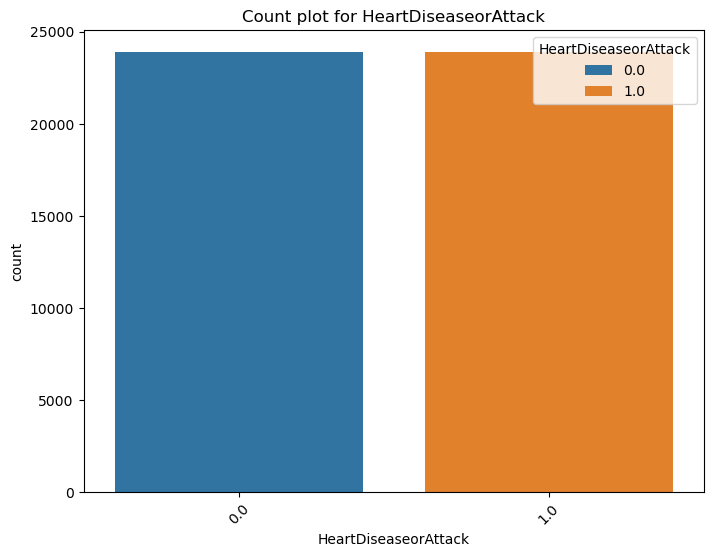

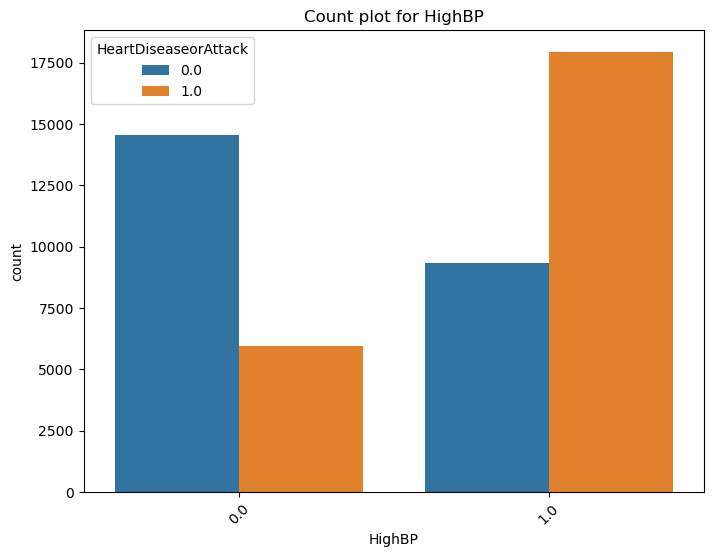

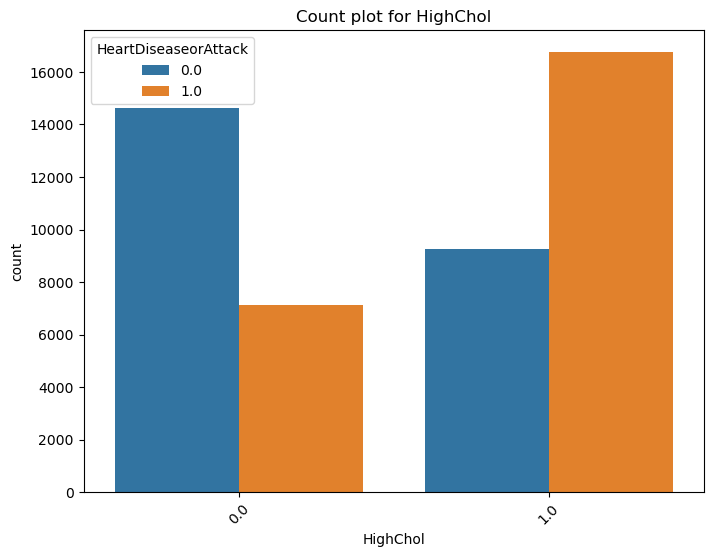

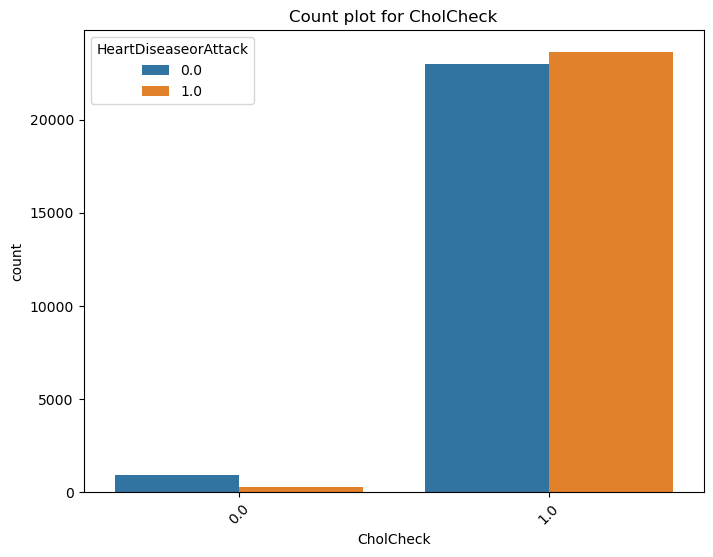

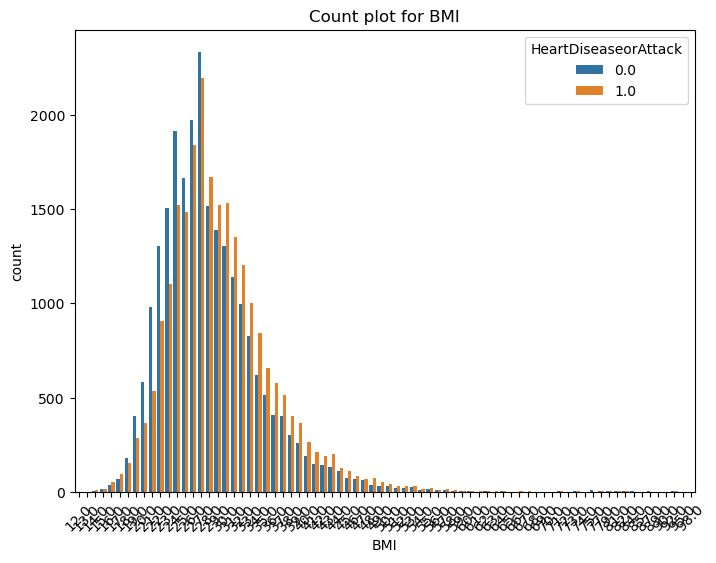

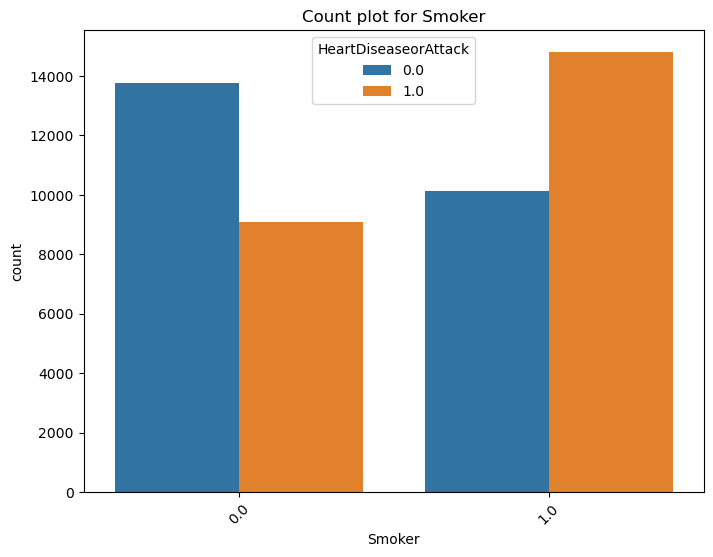

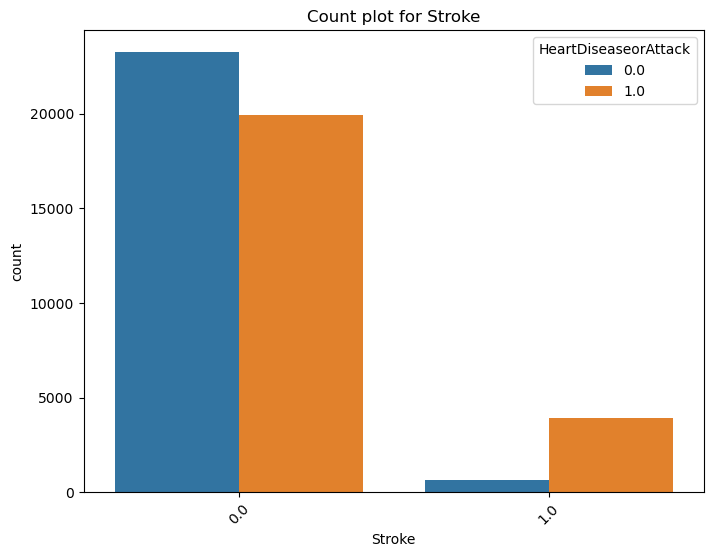

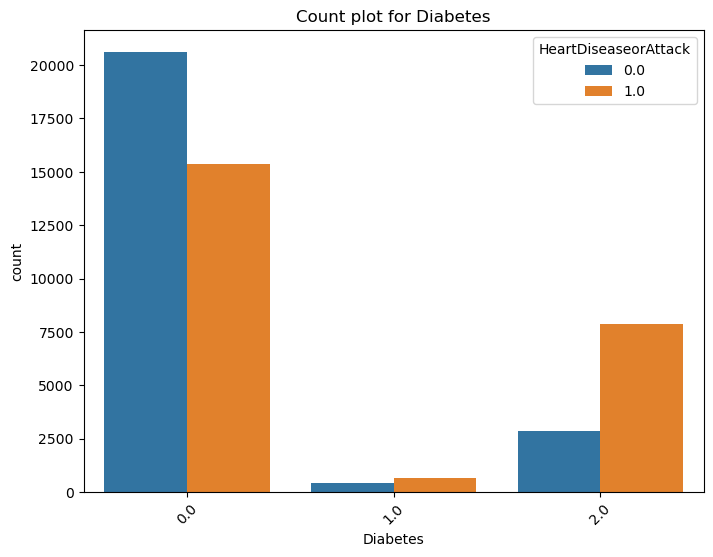

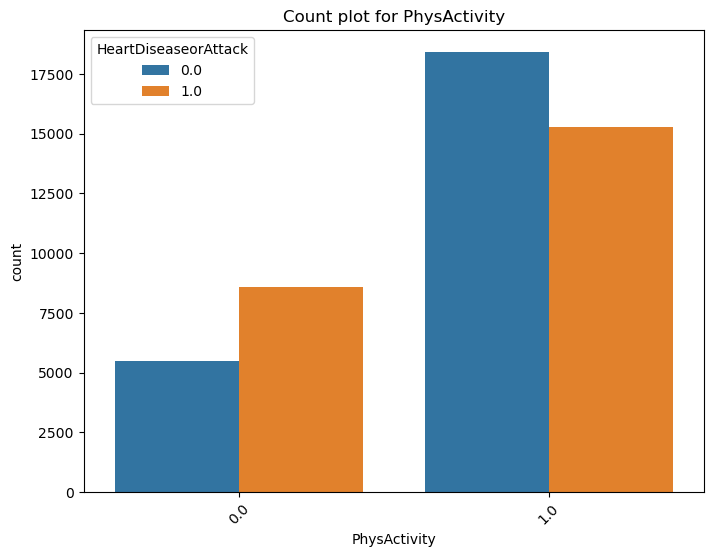

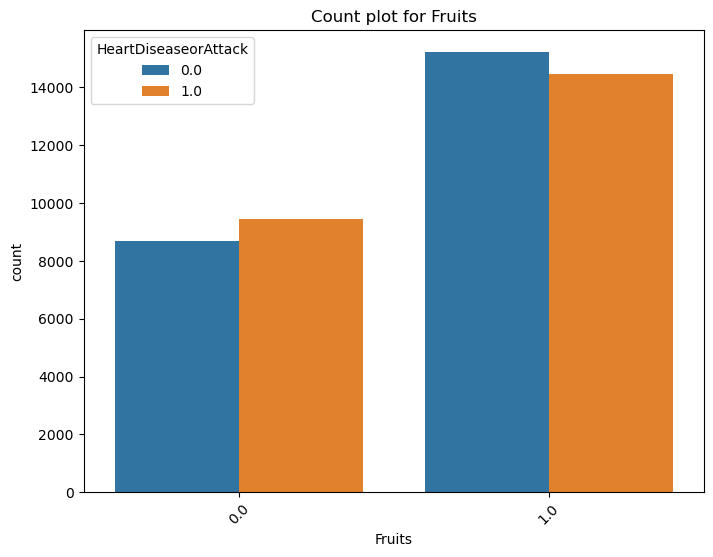

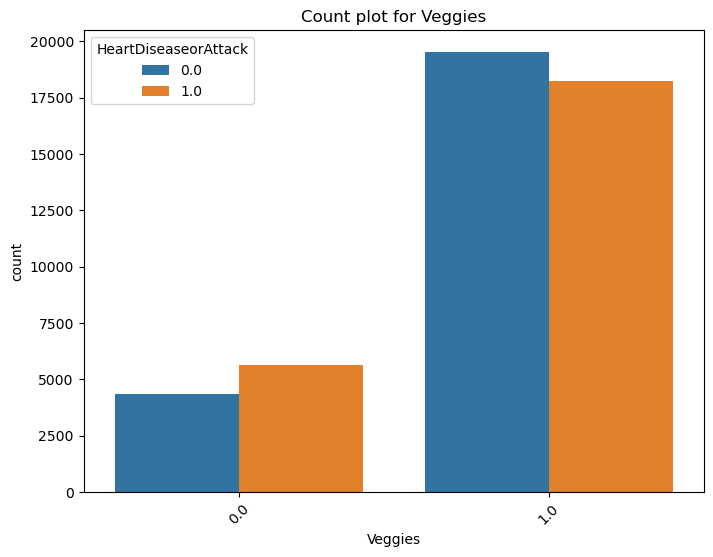

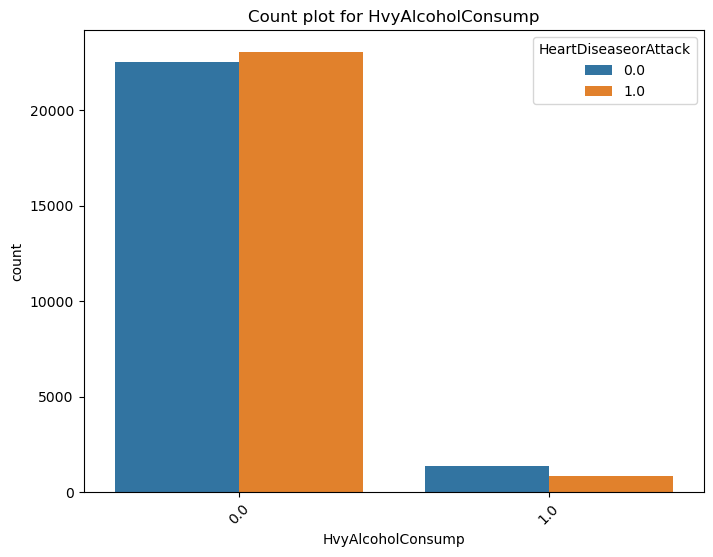

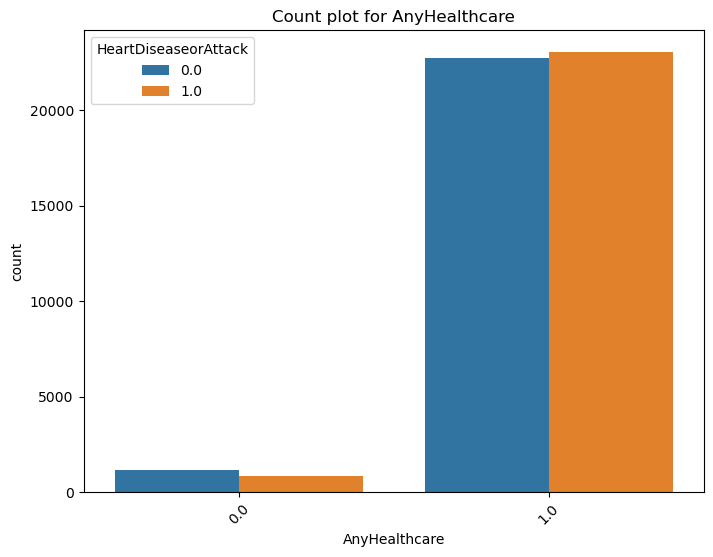

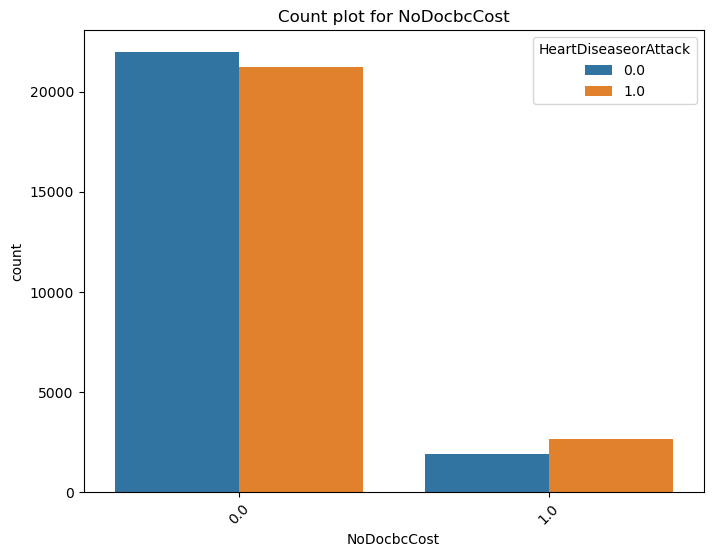

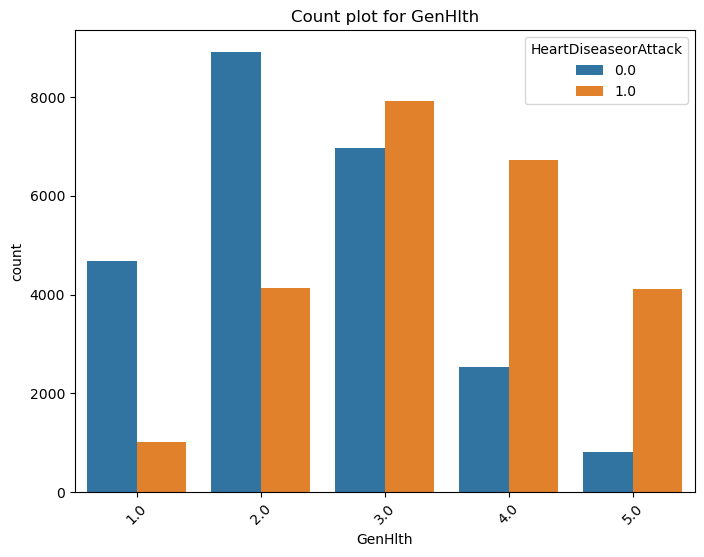

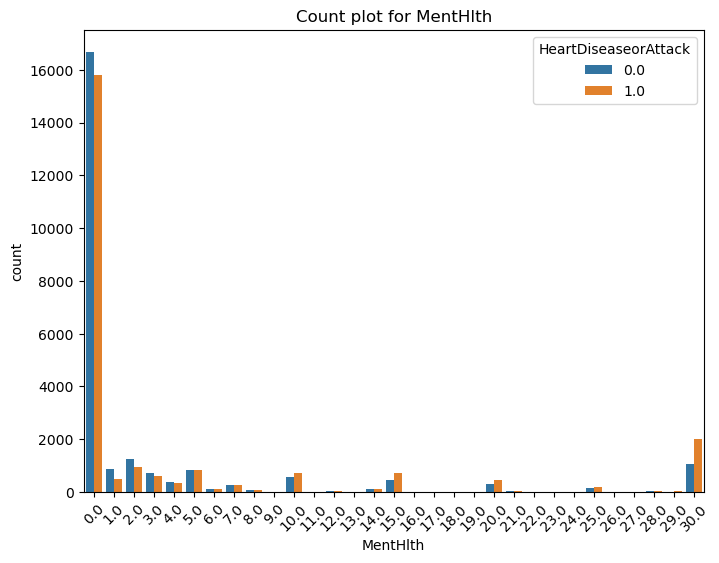

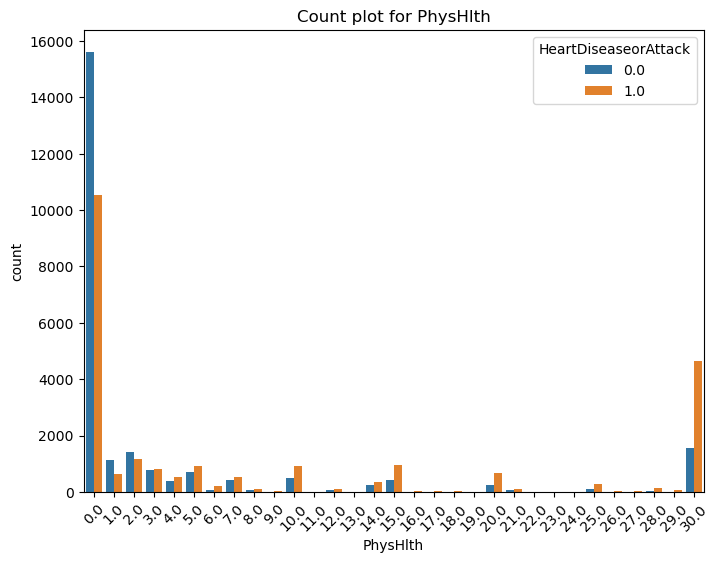

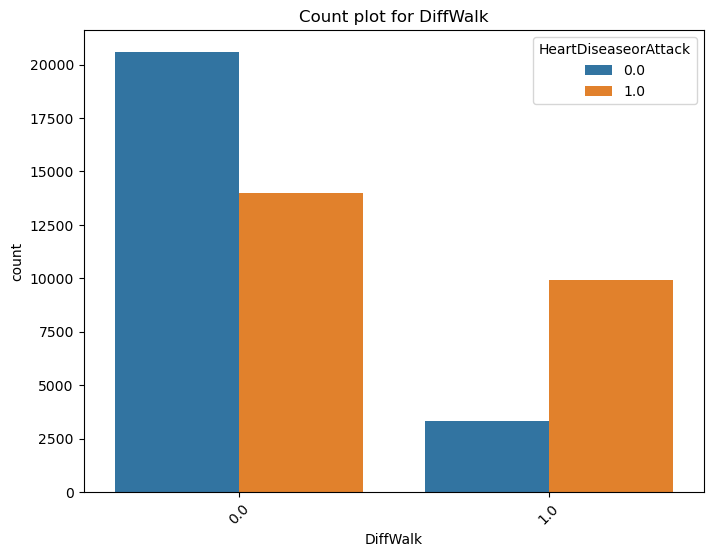

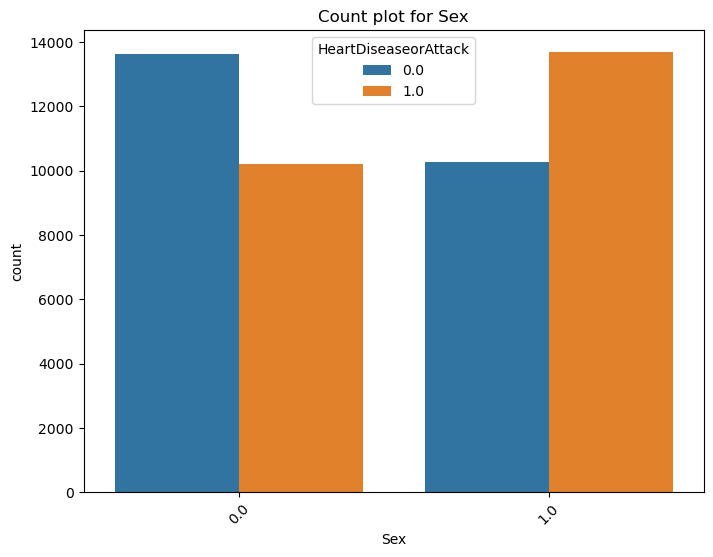

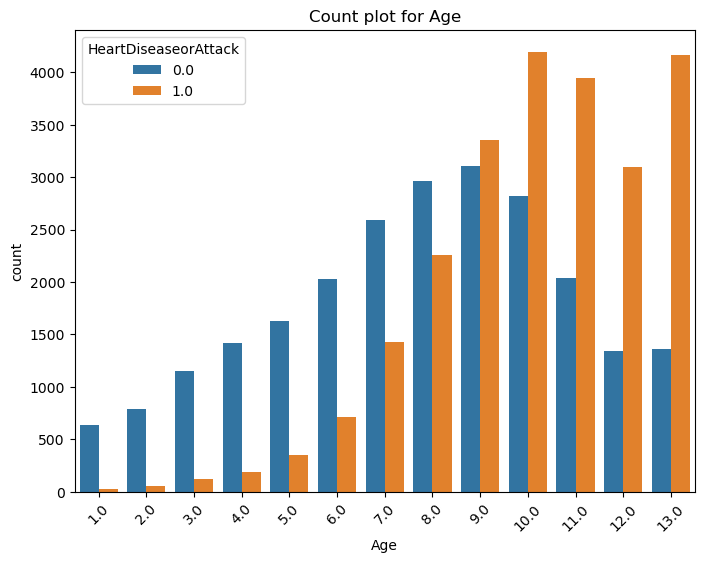

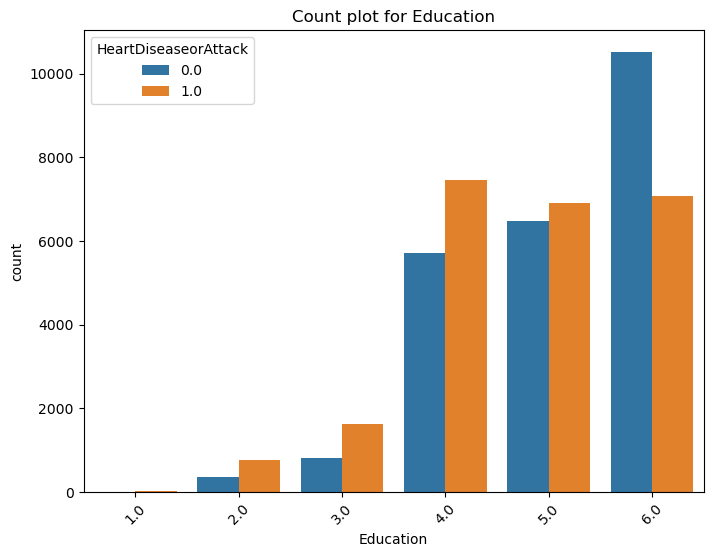

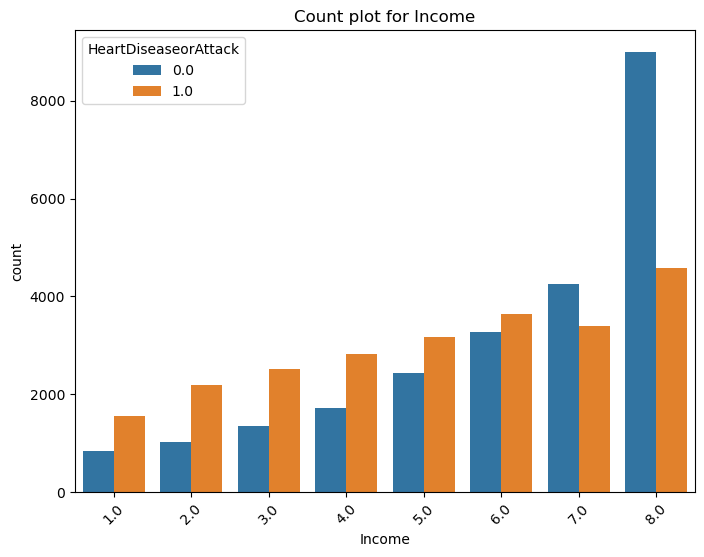

In [122]:
for col in resampled_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=resampled_df, x=col, hue='HeartDiseaseorAttack')
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

In [242]:
def test_col_pairs(df):
    target = df['HeartDiseaseorAttack']
    features = df.drop('HeartDiseaseorAttack', axis=1)
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)
    
    #Normalise all columns to be 0-1
    normalizer = MinMaxScaler()
    normalizer.fit(x_train)
    
    x_train_norm = normalizer.transform(x_train)
    x_test_norm = normalizer.transform(x_test)
    
    x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
    x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)
    results = []

    
    for i in range(len(x_train_norm.columns) - 1):
        col1 = x_train_norm.columns[i]
      
        for j in range(i + 1, len(x_train_norm.columns)):
            col2 = x_train_norm.columns[j]
        

            print(f"\rRunning for {col1} & {col2}", end="           ", flush=False )    
            knn = KNeighborsClassifier(n_neighbors=16)
            knn.fit(x_train_norm[[col1, col2]], y_train)
            y_pred = knn.predict(x_test_norm[[col1, col2]])
            
            # Confusion matrix
            cm = confusion_matrix(y_test, y_pred)

            # Calculate accuracy
            accuracy = (cm[0][0] + cm[1][1]) / (sum(cm[0]) + sum(cm[1]))

            recall = recall_score(y_test, y_pred)
            
            # Calculate Kappa score
            kappa = cohen_kappa_score(y_test, y_pred)
                        
            #print(f" Accuracy: {100*(accuracy): .2f}%")
            #print(f"Cohen's Kappa: {kappa:.4f}")
            #print(cm)
            #print()

            results.append({
                "col1": col1,
                "col2": col2,
                "kappa": kappa,
                "recall": recall,
                "accuracy": accuracy
            })

    results_df = pd.DataFrame(results) 
    
    df2 = results_df.rename(columns={"col1": "temp", "col2": "col1"})
    df2 = df2.rename(columns={"temp": "col2"})
    df2 = df2[['col1', 'col2', 'kappa', 'recall', 'accuracy']]
    
    result_df = pd.concat([results_df, df2], axis=0)   
    return result_df

In [244]:
result_df = test_col_pairs(resampled_df)
result_df.head()

Running for Education & Income                          

,col1,col2,kappa,recall,accuracy
0,HighBP,HighChol,0.314438,0.696811,0.657146
1,HighBP,CholCheck,0.356381,0.747167,0.678071
2,HighBP,BMI,0.292606,0.612044,0.646370
3,HighBP,Smoker,0.356381,0.747167,0.678071
4,HighBP,Stroke,0.380927,0.781158,0.690312


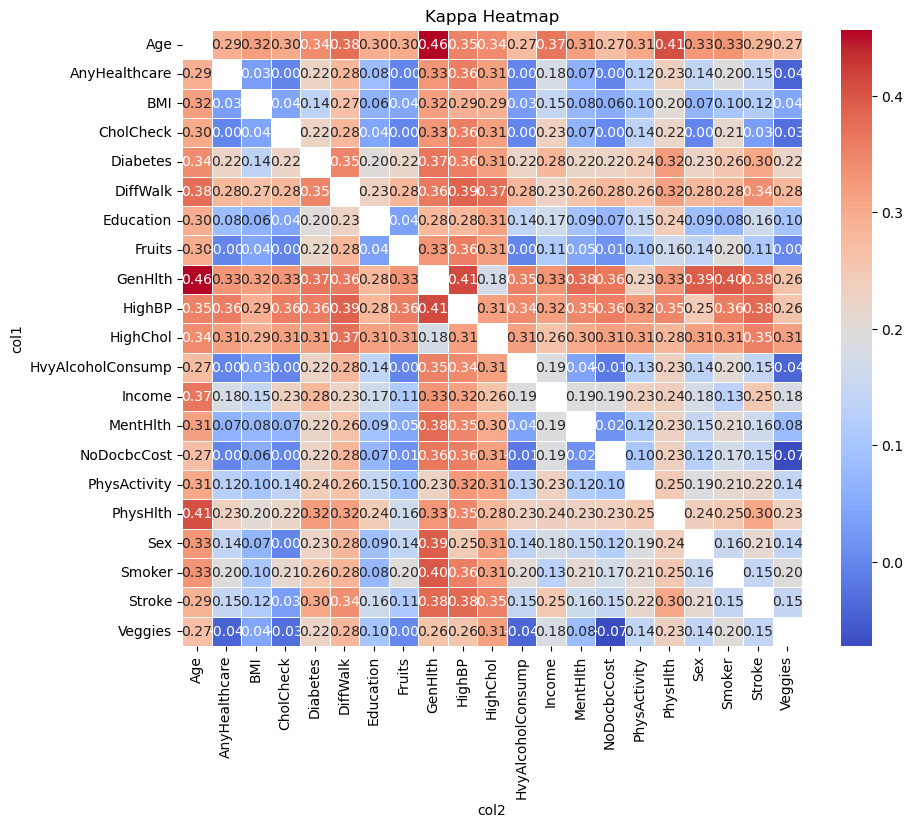

In [250]:
heatmap_data = result_df.pivot(index='col1', columns='col2', values='kappa')

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size if needed
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Kappa Heatmap')
plt.show()

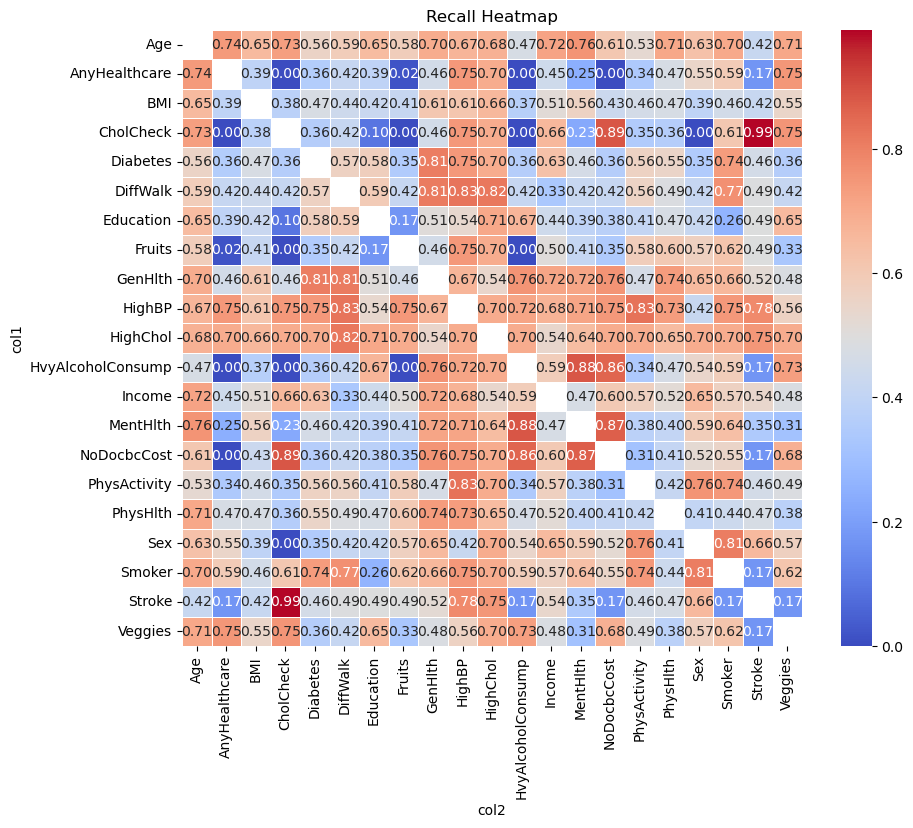

In [252]:
heatmap_data = result_df.pivot(index='col1', columns='col2', values='recall')

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size if needed
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Recall Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame df
target = resampled_df['HeartDiseaseorAttack']
features = resampled_df.drop('HeartDiseaseorAttack', axis=1)



# Apply MinMaxScaler to normalize the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Optionally, apply feature weights here. For example:
# Weight the first feature more heavily
weights = [2, 1, 1, 1, 1]  # Example weights for each feature, adjust as needed

# Multiply each column by its corresponding weight
weighted_features = scaled_features * weights

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(weighted_features, target, test_size=0.20, random_state=0)

# Initialize the KNN model with the optimized k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

# Test the model
accuracy = knn.score(x_test, y_test)
print(f"Accuracy: {accuracy:.3f}")